<a href="https://colab.research.google.com/github/pedromirsky/Calculo-Numerico/blob/main/Parcial_2_CN_Pedro_Derivadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [ ]:
import sympy as sp

In [ ]:
import sympy as sp
x = sp.symbols('x')
f2 = 4*x**2+3
f1 = 5*x**3+3*x

Adelante

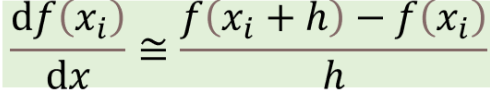

In [ ]:
def adelante(f,xi,h=1):
  '''derivación numérica hacia adelante, 
  f: es la función utilizando sympy, 
  xi: el punto donde evaluar y 
  h: es la distancia entre xi+1 - xi'''

  resultado=0
  resultado=(f.evalf(subs={x:xi+h})-f.evalf(subs={x:xi}))/h
          #(f.subs(x,(xi+h))-f.subs(x,xi))/h


  return resultado

Atras

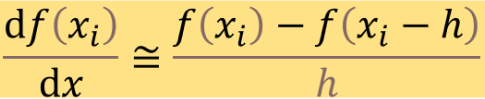

In [ ]:
def atras(f,xi,h=1):
  '''derivación numérica hacia adelante, 
  f: es la función utilizando sympy, 
  xi: el punto donde evaluar y 
  h: es la distancia entre xi - xi-1'''


  resultado=0
  resultado=(f.evalf(subs={x:xi})-f.evalf(subs={x:xi-h}))/h
  

  return resultado

Centrado

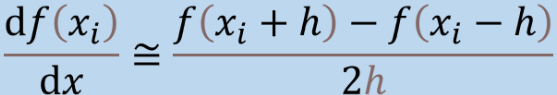

In [ ]:
def centrado(f,xi,h=1):
  '''derivación numérica hacia adelante, 
  f: es la función utilizando sympy, 
  xi: el punto donde evaluar y 
  h: es la distancia entre xi - xi-1 o xi+h-xi'''

  resultado=0
  resultado=(f.evalf(subs={x:xi+h})-f.evalf(subs={x:xi-h}))/(2*h)
  
  
  return resultado

In [ ]:
hlista = [2, 1, 0.1, 0.001]
print("f1 por Adelante: ")
for h in hlista:
  print("para h = ",h, "--> df(xi)/dx = " ,adelante(f1,2,h))

print("")



f1 por Adelante: 
para h =  2 --> df(xi)/dx =  143.000000000000
para h =  1 --> df(xi)/dx =  98.0000000000000
para h =  0.1 --> df(xi)/dx =  66.0500000000000
para h =  0.001 --> df(xi)/dx =  63.0300049999946



In [ ]:
def real(f,xi):
  df = sp.diff(f,x)

  return df.subs(x,xi)

real(f1,2)

63

In [ ]:
for h in hlista:
  print("error para h = ", h, ": ", abs(real(f1,2)-adelante(f1,2,h))) 


error para h =  2 :  80.0000000000000
error para h =  1 :  35.0000000000000
error para h =  0.1 :  3.05000000000004
error para h =  0.001 :  0.0300049999945600


In [ ]:
import pandas as pd

e_adel_f1 = []
e_atras_f1 = []
e_cen_f1 = []

for h in hlista:
  e_adel_f1.append(abs(real(f1,2)-adelante(f1,2,h))) 
  e_atras_f1.append(abs(real(f1,2)-atras(f1,2,h))) 
  e_cen_f1.append(abs(real(f1,2)-centrado(f1,2,h))) 




errores_f1 = {
    'h': hlista,
    'adelante' : e_adel_f1,
    'atras' :    e_atras_f1,
    'centrado' : e_cen_f1,
    }

errores_f1 = pd.DataFrame(errores_f1)
errores_f1 = errores_f1.astype(float) 

errores_f1.head()

,h,adelante,atras,centrado
0,2.000,80.000000,40.000000,20.000000
1,1.000,35.000000,25.000000,5.000000
2,0.100,3.050000,2.950000,0.050000
3,0.001,0.030005,0.029995,0.000005


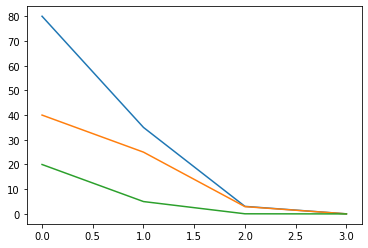

In [ ]:
errores_f1['adelante'].plot() #azul
errores_f1['atras'].plot() #naranja
errores_f1['centrado'].plot()  # verde